In [1]:
# Overall Study Goal - determine whether increasing the size of the food images on a menu yields more customer orders

In [2]:
# GOAL 1 - Evaluate the A/B test design – Assess the experiment’s methodology and suggest improvements

In the UX design mockups, image A displays what the previous UI showed with smaller pictures of the food and image B shows the test design with larger pictures of the food. Note - by increasing image size, we are compromising on the amount of text we're showing, which could have unintended consequences on user decisions as well. Additionally, we are running the test only from Monday-Saturday, which doesn't capture how users might make decisions on Sundays. Being that Sunday is a weekend and the most popular day to order food (https://www.tryotter.com/en-gb/blog/industry/online-food-delivery-statistics), the data collected might not be an accurate reflection of user behavior and order patterns. Another important data point to consider is whether the customer is a frequent orderer or not. A customer who has ordered from Sushi Star Takeaway previously might already know what they are going to purchase before even entering the website, and would be less likely to have their decision impacted by the image size. 

My suggested improvements would be:
1. Determine whether or not the test group - B will be impacted by the lack of food description shown on the new mockup, and if so consider introducing a third option, one which shows an englarged image as well as the description of the food. This could involve only displaying 1 or 2 menu items per page, in order to fit both.
2. Extend the study to capture a full week, including Sundays
3. Include user context by looking up user ID to see if the user has ordered Sushi Star Takeaway previously. Then classify users into 3 or more groups - first time customer, previous but not frequent customer (<5 times), or frequent customer (>5 times). Determine if being a frequent customer is significantly less influenced by photo size and if so, remove these customers.
4. Always make sure that there is as little variation between the 2 groups as possible so we can rule out other factors that might influence customer decision making. In this case, we want to make sure that if there is a promotion available to one group, the same promotion should be available to the other groups. In the UX mockups image A (control) has a promotion where spending £10 gets a free delivery, whereas image B (test) shows that spending £25 gets you a free item. To ensure that these promotions aren't influencing customer decisions, the promotions should be the same across all groups.

In [3]:
# GOAL 2 - Analyze the dataset / Exploratory Data Analysis

In [4]:
# load data
import pandas as pd

food_data = pd.read_csv('DATASET.csv')
print(food_data.head(10))

# extract information we need - variation, event type, final order status
# get unique user ids
food_data_unique_customers = food_data['user_id'].unique()
print('number of unique users: ', len(food_data_unique_customers)) # 100000 unique users

# get number of orders per day of the week using pandas datetime object
# note - date of the format 2024-11-24 is monday, 2024-11-25 is tuesday, ..., 2024-11-30 is saturday
food_data['datetime_event'] = pd.to_datetime(food_data['datetime_event'])
food_data['day_of_week'] = food_data['datetime_event'].dt.day_name()

# get number of unique control group members and number of test group members
control_group = food_data[food_data['variation'] == 1]
test_group = food_data[food_data['variation'] == 2]

control_group_unique_customers = control_group['user_id'].unique()
test_group_unique_customers = test_group['user_id'].unique()

print('number of unique customers in control group: ', len(control_group_unique_customers))
print('number of unique customers in test group: ', len(test_group_unique_customers))

   event_id  session_id  user_id  variation platform  \
0  63527610     6391574   762832          2  Android   
1  12446736     6391574   762832          2  Android   
2  90232698     6391574   762832          2  Android   
3  74183469     9246026   762832          2  Android   
4  16360628     9246026   762832          2  Android   
5  87975585     9457939   762832          2  Android   
6  79159985     9929810   762832          2  Android   
7  53691402     9929810   762832          2  Android   
8  82931550     9929810   762832          2  Android   
9  15277830     2243403   762832          2  Android   

                  datetime_event       event_type final_order_status  shop_id  
0  2024-11-30 16:23:46.391133804    entry_to_shop         successful   8531.0  
1  2024-11-30 16:26:16.875713965       order_paid         successful   8531.0  
2  2024-11-30 16:50:44.827088753   order_finished         successful   8531.0  
3  2024-11-29 13:21:28.729203894  reload_the_page              

In [5]:
# See results of A/B tests using control group and test group split from above
# control_group = food_data[food_data['variation'] == 1]
# test_group = food_data[food_data['variation'] == 2]

day_of_week
Friday       10205
Saturday      7553
Thursday      4581
Tuesday       4062
Wednesday     3980
Monday        3673
Sunday          86
Name: count, dtype: int64


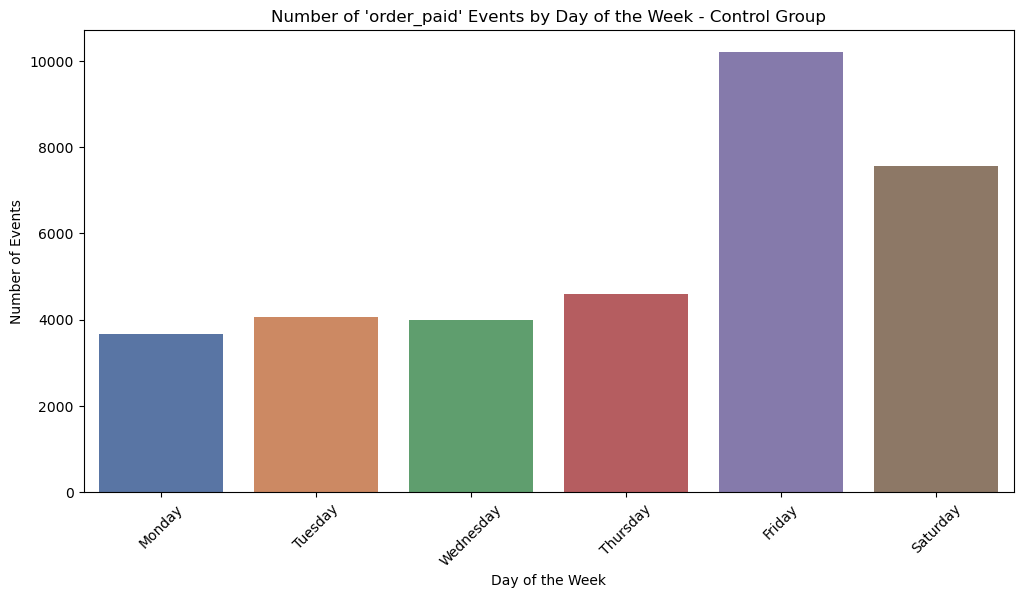

In [6]:
# see how many 'order_paid' event types there are on each day of the week for the control group
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for 'order_paid' events
order_paid_control_group = control_group[control_group['event_type'] == 'order_paid']

# Count 'order_paid' events per day_of_week
day_counts = order_paid_control_group['day_of_week'].value_counts()
print(day_counts)

# Sort by weekday order (Monday to Sunday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_counts = day_counts.reindex(weekday_order, fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, hue=day_counts.index, palette='deep')
plt.title("Number of 'order_paid' Events by Day of the Week - Control Group")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()


day_of_week
Friday       5407
Saturday     4091
Thursday     2394
Wednesday    2240
Tuesday      2200
Monday       1894
Sunday         52
Name: count, dtype: int64


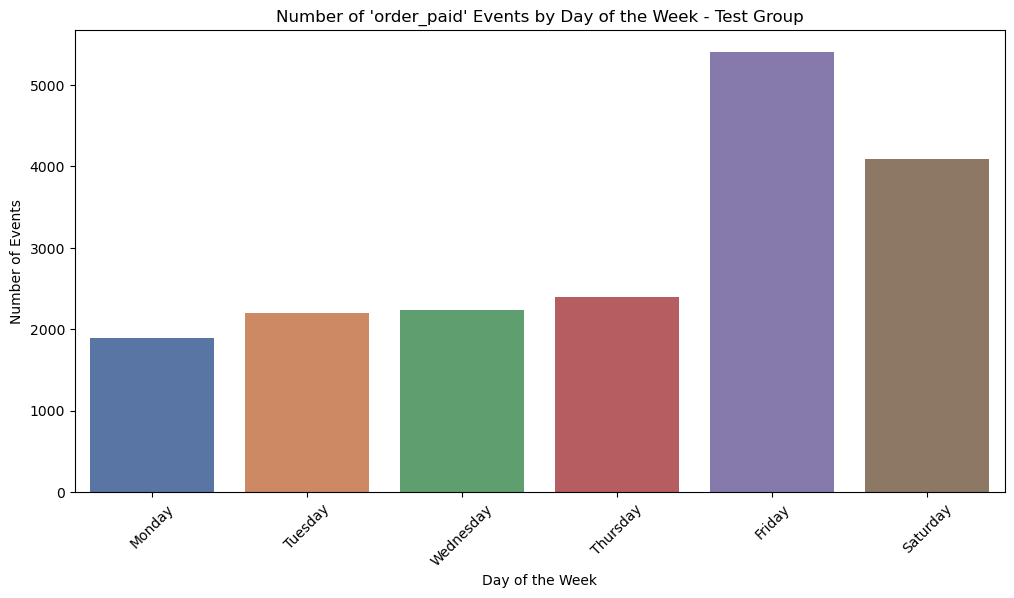

In [7]:
# see how many 'order_paid' event types there are on each day of the week for the test group

import matplotlib.pyplot as plt
import seaborn as sns

# Filter for 'order_paid' events
order_paid_test_group = test_group[test_group['event_type'] == 'order_paid']

# Count 'order_paid' events per day_of_week
day_counts = order_paid_test_group['day_of_week'].value_counts()
print(day_counts)

# Sort by weekday order (Monday to Sunday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_counts = day_counts.reindex(weekday_order, fill_value=0)

# total number of weekend (friday-saturday) customers = 10205 + 7553 + 5407 + 4091 = 27256 --> 27%

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, hue=day_counts.index, palette='deep')
plt.title("Number of 'order_paid' Events by Day of the Week - Test Group")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()


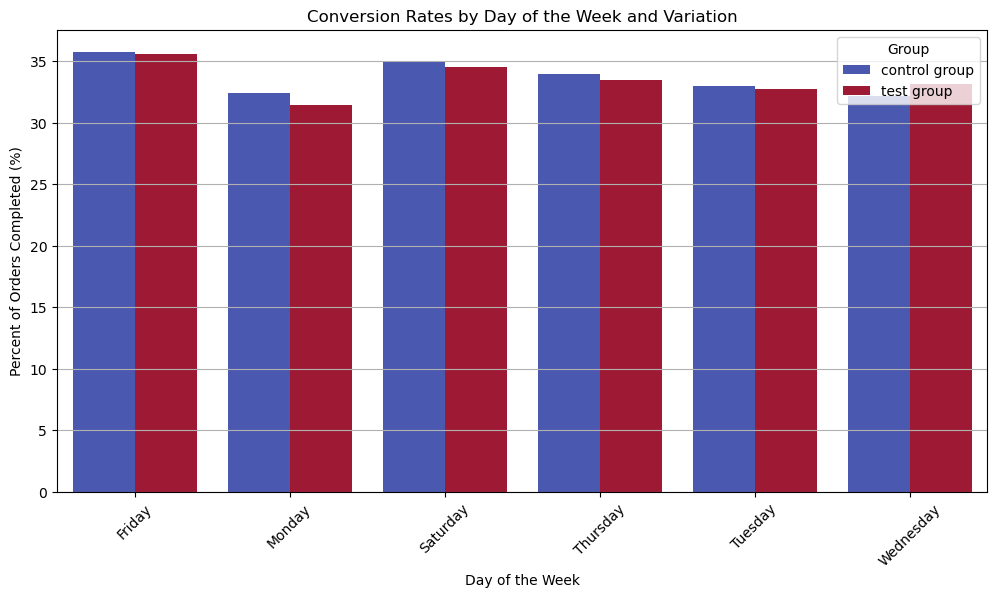

In [8]:
# Compare results of A/B groups and order rates on all days of the study
order_completed_data = food_data.groupby(['variation', 'day_of_week', 'event_type'])['user_id'].nunique().reset_index()

# get all shop views, will be used for % order completion 
entry_to_shop_data = order_completed_data[order_completed_data['event_type'] == 'entry_to_shop']
# get all completed orders
order_paid_data = order_completed_data[order_completed_data['event_type'] == 'order_paid']

# Merge the two datasets on variation and day_of_week
merged_data = pd.merge(entry_to_shop_data, order_paid_data, 
                        on=['variation', 'day_of_week'], 
                        suffixes=('_entry', '_paid'), 
                        how='left').fillna(0)

# Calculate the rate of order_paid to entry_to_shop
merged_data['rate_of_order_completion'] = (merged_data['user_id_paid'] / merged_data['user_id_entry']) * 100

plt.figure(figsize=(12, 6))

# set up graph comparing order completion % between test and control groups
axis = sns.barplot(data=merged_data, x='day_of_week', y='rate_of_order_completion', hue='variation', palette='coolwarm')
plt.title("Conversion Rates by Day of the Week and Variation")
plt.xlabel("Day of the Week")
plt.ylabel("Percent of Orders Completed (%)")
plt.xticks(rotation=45)
handles, labels = axis.get_legend_handles_labels()

plt.legend(handles=handles, labels=['control group', 'test group'], title='Group')
plt.grid(axis='y', linestyle='-')
plt.show()



In [9]:
# Now compare overall completion rate for each group - not day of the week dependent
order_data_control = food_data[food_data['variation'] == 1]
order_data_test = food_data[food_data['variation'] == 2]

rate_of_order_completion_control = ((order_data_control['event_type'] == 'order_paid').sum() 
/ (order_data_control['event_type'] == 'entry_to_shop').sum()) * 100
rate_of_order_completion_test = ((order_data_test['event_type'] == 'order_paid').sum() 
/ (order_data_test['event_type'] == 'entry_to_shop').sum()) * 100

print(f"Control Group Order Completion Rate: {rate_of_order_completion_control:.2f}%")
print(f"Test Group Order Completion Rate: {rate_of_order_completion_test:.2f}%")


Control Group Order Completion Rate: 31.23%
Test Group Order Completion Rate: 31.04%


In [10]:
# Determine if results of A/B test are statistically significant using statsmodels api
import statsmodels.api as sm

num_customers_paid_control = (order_data_control['event_type'] == 'order_paid').sum()
total_customers_control = (order_data_control['event_type'] == 'entry_to_shop').sum()

num_customers_paid_test = (order_data_test['event_type'] == 'order_paid').sum()
total_customers_test = (order_data_test['event_type'] == 'entry_to_shop').sum()

z_stat, p_val = sm.stats.proportions_ztest([num_customers_paid_control, num_customers_paid_test], [total_customers_control, total_customers_test])

print(f"{p_val:.2f} > 0.05 means the difference in order completion rate between test and control groups is not statistically significant")

0.42 > 0.05 means the difference in order completion rate between test and control groups is not statistically significant


In [11]:
# GOAL 3 - Draw conclusions & make business recommendations – Provide data-driven advice on the next steps for the product team

In the previous step, I used the total number of purchases made out of the total number of customers that viewed the shops for both the control group (with the smaller images), and the test group (with the larger images). a P-Score of greater than 0.05, means that the difference between these 2 values was not statistically significant. In other words, increasing the size of the image did not make a significant difference in the number of purchases made. 

In this study, our control group made up 65% of customers and the test group (with enlarged images) made up 35% of customers. Of the control group, 31.23% of all viewers paid for an order, and of the test group 31.04% of all customers paid for an order. Because of this, I would suggest that the product team should not make the change to design B. However I think it could be useful to run the study again with a few slight changes. First, I would suggest a study that ran the entire duration of the week including Sunday, because the study published by Tryotter in 2023 showed that the most popular food delivery days are Friday, Saturday, and Sunday - 4% more than Monday. I would even go as far as suggesting running the study ONLY on weekends over the span of a few weeks, since weekends see much higher traffic in general (27.256 total customers viewed the webpage on Friday or Saturday). Second, I think it could be useful to re-run the study with a different mockup - one that includes both the description of the food and an enlarged image of the food. In this study our mock for the test group showed very large images with no descriptions, but some customers might still find the descriptions useful in decision making. Running the study again without removing the descriptions would allow us to focus solely on analyzing if larger images make a difference. Finally, I would recommend trying to gather user context in the study, factoring in repeat customers who might already know their order in advance, under the assumption that new customers are more likely to spend more time reading item descriptions or looking at item images.

Ultimately though, the results of this study show that enlarging images of menu items do not influence customer decisions or likelihood of purchasing items.